In [1]:
#Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns





In [2]:
#Read the csv files
listings_df = pd.read_csv('listings.csv')
calendar_df = pd.read_csv('calendar.csv')
reviews_df = pd.read_csv('reviews.csv')


In [3]:
def get_column_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        if series.dtype.kind == 'i':
            return 'Discrete'
        elif series.dtype.kind == 'f':
            return 'Continuous'
    elif pd.api.types.is_string_dtype(series):
        return 'String'
    else:
        return 'Unknown'

def dataframe_data_types(df):
    column_types = df.apply(get_column_data_type)
    return column_types


In [4]:
#Look at the listings dataframe
listings_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [5]:
# Get data types for listings_df
data_types = dataframe_data_types(listings_df)
print(data_types)
print(data_types.value_counts())


id                                    Discrete
listing_url                             String
scrape_id                             Discrete
last_scraped                            String
name                                    String
                                       ...    
cancellation_policy                     String
require_guest_profile_picture           String
require_guest_phone_verification        String
calculated_host_listings_count        Discrete
reviews_per_month                   Continuous
Length: 92, dtype: object
String        62
Continuous    17
Discrete      13
dtype: int64


In [6]:
#Look at the calendar dataframe
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [7]:
# Get data types for calendar_df
data_types = dataframe_data_types(calendar_df)
print(data_types)
print(data_types.value_counts())


listing_id    Discrete
date            String
available       String
price           String
dtype: object
String      3
Discrete    1
dtype: int64


In [8]:
#Look at the reviews dataframe
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [9]:
# Get data types for reviews_df
data_types = dataframe_data_types(reviews_df)
print(data_types)
print(data_types.value_counts())

listing_id       Discrete
id               Discrete
date               String
reviewer_id      Discrete
reviewer_name      String
comments           String
dtype: object
Discrete    3
String      3
dtype: int64


The number of missing value columns is 45 (48.91%).


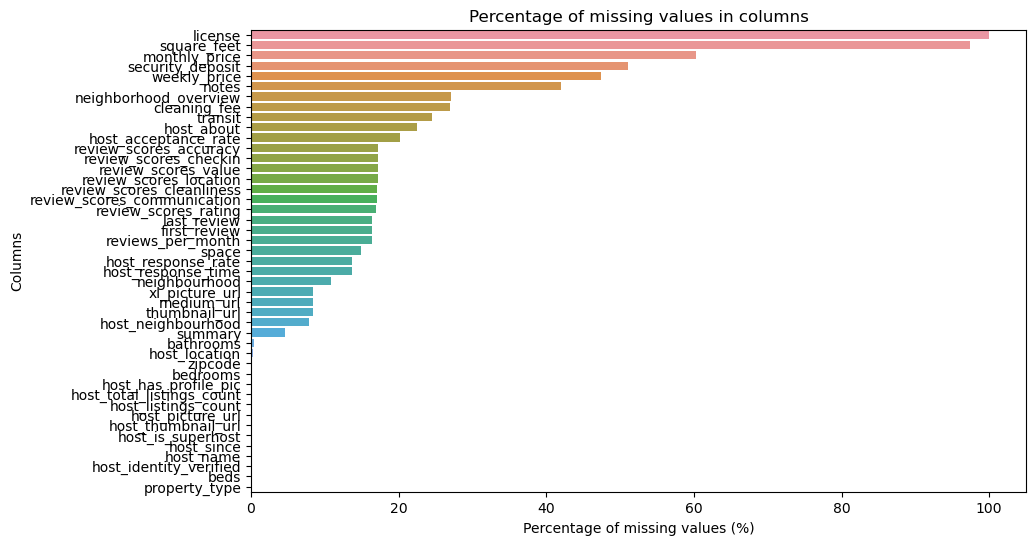

In [10]:
def plot_missing_values(df):
    # Understanding missing columns
    missing_values = df.isnull().sum()

    # Get only columns with missing values
    missing_values = missing_values[missing_values > 0]

    # Percentage of columns with missing values
    percentage_cols = round(len(missing_values)/df.shape[1]*100,2)
    print(f'The number of missing value columns is {len(missing_values)} ({percentage_cols:.2f}%).')

    # Calculate percentage
    missing_values_percentage = missing_values / len(df) * 100 

    # Sort the series for better visualization
    missing_values_percentage = missing_values_percentage.sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(10, 6)) 
    sns.barplot(x=missing_values_percentage.values, y=missing_values_percentage.index)

    plt.title('Percentage of missing values in columns')
    plt.xlabel('Percentage of missing values (%)')
    plt.ylabel('Columns')

    plt.show()


# Plot missing values for listings_df
plot_missing_values(listings_df)

The number of missing value columns is 1 (25.00%).


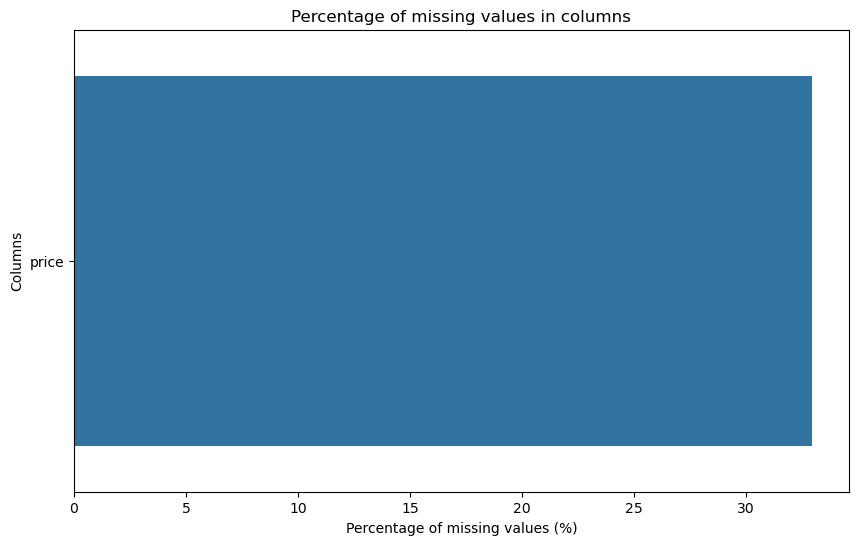

In [11]:
# Plot missing values for calendar_df
plot_missing_values(calendar_df)

The number of missing value columns is 1 (16.67%).


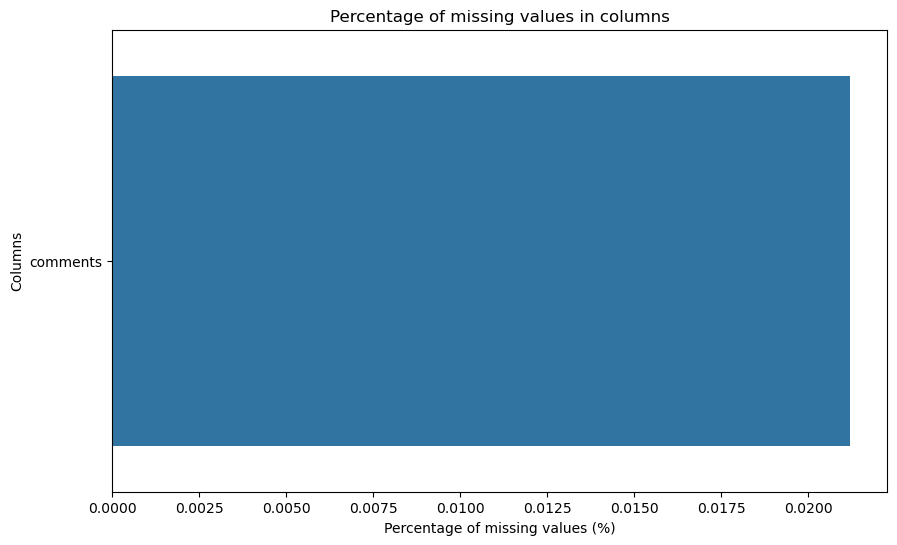

In [12]:
# Plot missing values for reviews_df
plot_missing_values(reviews_df)

### Q1: How do the rental prices in Seattle change depending on the time of the year?

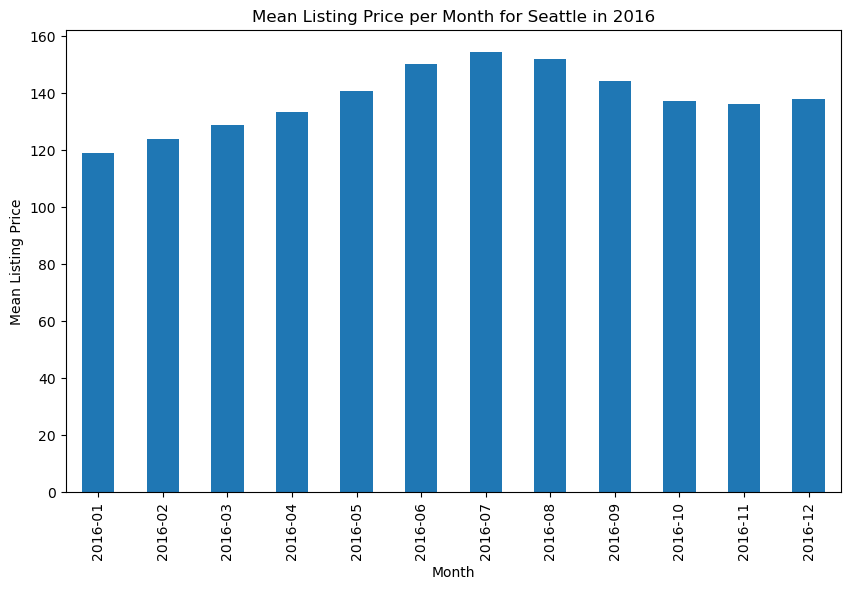

In [13]:
ques_df = calendar_df.copy()

# Convert 'date' to datetime if it's not already
ques_df['date'] = pd.to_datetime(ques_df['date'])

# Filter rows for the year 2016
ques_df = ques_df[ques_df['date'].dt.year == 2016]

# Create a 'month' column
ques_df['month'] = ques_df['date'].dt.to_period('M')

# Remove $sign
ques_df['price'] = ques_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Drop rows where 'price' is NaN
ques_df = ques_df.dropna(subset=['price'])

# Create a 'month' column
ques_df['month'] = ques_df['date'].dt.to_period('M')

# Group by 'listing_id' and 'month', and calculate the mean
mean_per_listing = ques_df.groupby(['listing_id', 'month'])['price'].mean()

# Reset the index (this turns 'listing_id' and 'month' back into columns from the index)
mean_per_listing = mean_per_listing.reset_index()

# Group by 'month' alone and calculate the mean of these means
mean_per_city = mean_per_listing.groupby('month')['price'].mean()

# Plot
mean_per_city.plot(kind='bar', figsize=(10,6))

plt.title('Mean Listing Price per Month for Seattle in 2016')
plt.xlabel('Month')
plt.ylabel('Mean Listing Price')
plt.show()

### Q2 How does the availability of AirBnB accomodations change in Seattle throughout this year?

3818


C:\Users\2J0442897\AppData\Local\Temp\ipykernel_36380\2254713365.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_df['month'] = calendar_df['date'].dt.to_period('M')
C:\Users\2J0442897\AppData\Local\Temp\ipykernel_36380\2254713365.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_df['available'] = calendar_df['available'].map({'t': 1, 'f': 0})


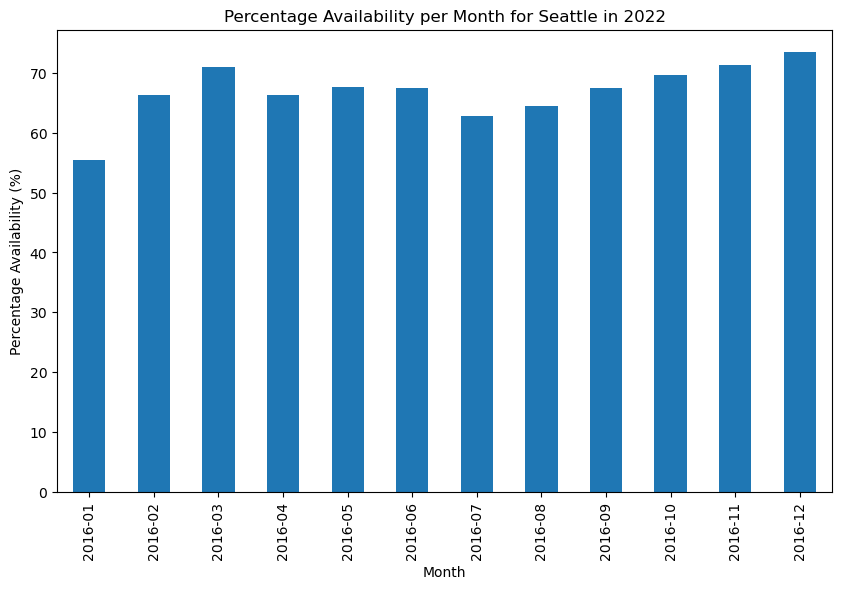

In [14]:
ques_df = calendar_df.copy()

#Confirm that the number of listings matches the number in a different database
print(calendar_df['listing_id'].nunique())

# Convert 'date' to datetime if it's not already
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

# Filter rows for the year 2016
calendar_df = calendar_df[calendar_df['date'].dt.year == 2016]

# Create a 'month' column
calendar_df['month'] = calendar_df['date'].dt.to_period('M')

# Convert 'available' to numeric (1 for 't', 0 for 'f')
calendar_df['available'] = calendar_df['available'].map({'t': 1, 'f': 0})

# Group by 'month' and calculate the mean availability
mean_availability = calendar_df.groupby('month')['available'].mean()

# Convert to percentage
mean_availability_percentage = mean_availability * 100

# Plot
mean_availability_percentage.plot(kind='bar', figsize=(10,6))

plt.title('Percentage Availability per Month for Seattle in 2022')
plt.xlabel('Month')
plt.ylabel('Percentage Availability (%)')
plt.show()

### Q3 How are some relevant details about the AirBnB correlated with the price of the rental?

In [15]:
#Get a list of columns that are interesting for this kind of analysis
df_columns = ['host_response_rate','accommodates','bathrooms','bedrooms','price','guests_included','review_scores_rating','amenities']

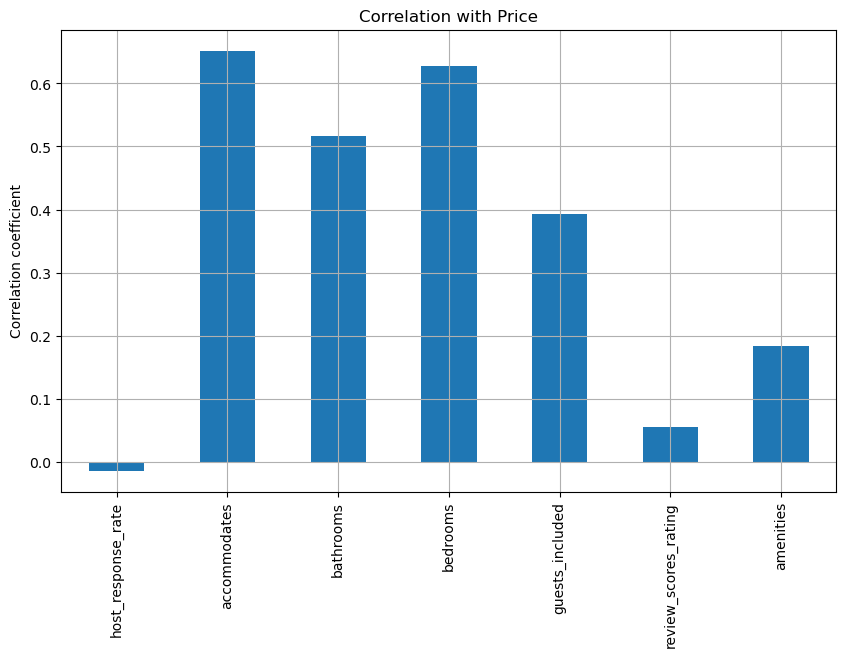

In [16]:
ques_df = listings_df.copy()

# Drop rows where 'price' is NaN
ques_df = listings_df.dropna(subset=['price'])

#Format the price columny properly for analysis
ques_df['price'] = ques_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

#Format the percentage data for analysis
ques_df['host_response_rate'] = pd.to_numeric(ques_df['host_response_rate'].str.replace('%', ''))

#Extract the number of items in amenities
ques_df['amenities'] = ques_df['amenities'].apply(lambda x: len(x.strip("{}").split(",")))


# Calculate correlation matrix
corr = ques_df[df_columns].corr()


#Get correlations for price
corr_price = corr.price


plt.figure(figsize=(10, 6))

# Plot bar chart
corr_price.drop('price').plot(kind='bar') 
# We drop 'price' because the correlation of 'price' with itself is 1, and it's not informative.

plt.title('Correlation with Price')
plt.ylabel('Correlation coefficient')
plt.grid(True)
plt.show()